# Generating Graphs in The Python

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

## Erdos-Renyi Distribution of Graphs $G(n,p)$

Consider the following random experiment.
- Start with an empty graph on $n$ nodes
- For each pair of nodes, add an edge between the pair with probability $p$ independent of other pairs

$G(n,p)$ is a distribution over $n$-vertex random graphs generated by the above process.

If $p = 0.5$, then it generates a uniform distribution over $n$-vertex graphs.

In [2]:
# Generate Erdos-Renyi Random Graph by Hand (n = 20, p = 0.1, 0.5, 0.9)
random.seed()

n = 20
p = 0.1

G = nx.Graph()
nodes = range(n)
G.add_nodes_from(nodes)

#adding the edges
for i in range(n):
    for j in range(i+1, n): #only add edge once
        if random.random() < p:
            G.add_edge(i, j)

In [3]:
# Checking some common parameters and properties of the graph to wrap it up as a function so that we can reuse it for other graphs
def graph_stats(G):
    print("Number of nodes \t=", G.number_of_nodes())
    print("Number of edges \t=", G.number_of_edges())
    print("Average Degree \t\t=", 2.0 * G.number_of_edges()/G.number_of_nodes())
    print("Number of components \t=", nx.number_connected_components(G))
    print("Largest component \t=", max([len(Gc)
          for Gc in nx.connected_components(G)]))
    if nx.is_connected(G):
        print("Diameter \t\t=", nx.diameter(G))
    print("Is planar \t\t=", nx.is_planar(G))
    print("Is bipartite \t\t=", nx.is_bipartite(G))

Number of nodes 	= 20
Number of edges 	= 21
Average Degree 		= 2.1
Number of components 	= 4
Largest component 	= 14
Is planar 		= True
Is bipartite 		= False


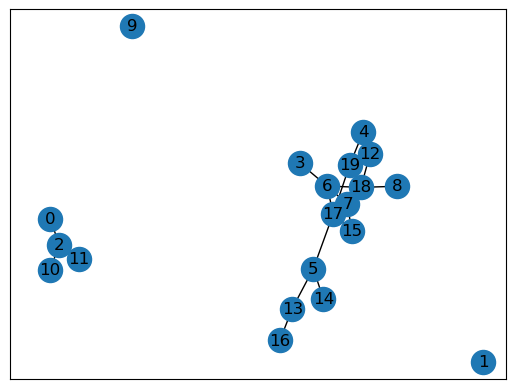

In [4]:
# Check the parameters of the generated graph and draw it
graph_stats(G)
pos = nx.circular_layout(nx.cycle_graph(n))
nx.draw_networkx(G)